In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bubushra","key":"0cffeb57ee8e207e20524ad866859e42"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d emmarex/plantdisease
!unzip plantdisease.zip -d plantdisease

Streaming output truncated to the last 5000 lines.
  inflating: plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantdisease

In [ ]:
import os
data_path = 'plantdisease'
print(os.listdir(data_path))

['plantvillage', 'PlantVillage']


**Data Preparation**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os

In [ ]:
# Define the dataset path and image parameters
DATASET_PATH = '/content/plantdisease/PlantVillage'
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = len(os.listdir(DATASET_PATH))

In [ ]:
# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Load training data
train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 16516 images belonging to 15 classes.


In [ ]:
# Load validation data
validation_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print(f"Number of classes: {NUM_CLASSES}")

Found 4122 images belonging to 15 classes.
Number of classes: 15


In [ ]:
def plot_history(history, title):
    """Function to plot training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

**Exercice 1**

In [ ]:
from tensorflow.keras.applications import VGG19, ResNet50, DenseNet121
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_and_train_from_scratch(base_model_class, model_name):
    """Build and train a model from scratch."""
    print(f"\n--- Training {model_name} from scratch ---")

    # Load the base model without pre-trained weights
    base_model = base_model_class(input_shape=(224, 224, 3), include_top=False, weights=None)

    # Add a new classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        epochs=10, # Note: Training for a small number of epochs for demonstration
        validation_data=validation_generator
    )

    plot_history(history, f'{model_name} (from scratch)')
    return history


--- Training VGG19 from scratch ---


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 449s 780ms/step - accuracy: 0.1616 - loss: 2.4999 - val_accuracy: 0.2552 - val_loss: 2.0781
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 360s 697ms/step - accuracy: 0.3330 - loss: 1.9612 - val_accuracy: 0.5095 - val_loss: 1.4692
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 361s 697ms/step - accuracy: 0.4993 - loss: 1.4736 - val_accuracy: 0.5747 - val_loss: 1.2416
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 360s 695ms/step - accuracy: 0.5814 - loss: 1.2183 - val_accuracy: 0.6475 - val_loss: 1.0146
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 360s 695ms/step - accuracy: 0.6663 - loss: 0.9770 - val_accuracy: 0.7217 - val_loss: 0.8113
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 358s 692ms/step - accuracy: 0.7303 - loss: 0.7915 - val_accuracy: 0.7246 - val_loss: 0.8109
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 358s 691ms/step - accuracy: 0.7686 - loss: 0.6413 - val_accuracy: 0.7979 - val_loss: 0.5672
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 357s 690ms/step - accuracy: 0.8177 -

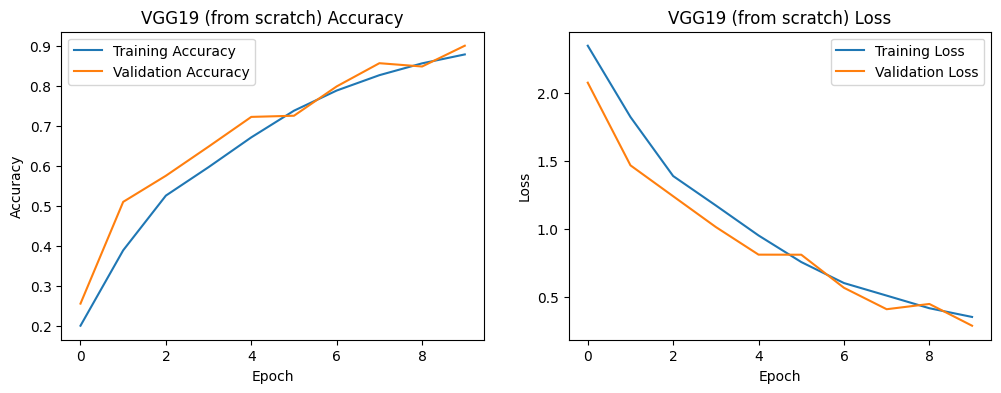


--- Training ResNet50 from scratch ---
Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 391s 642ms/step - accuracy: 0.4272 - loss: 1.8239 - val_accuracy: 0.2346 - val_loss: 5.5701
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 300s 580ms/step - accuracy: 0.7180 - loss: 0.8323 - val_accuracy: 0.4556 - val_loss: 2.0454
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 301s 581ms/step - accuracy: 0.7983 - loss: 0.6062 - val_accuracy: 0.6322 - val_loss: 1.3919
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 297s 574ms/step - accuracy: 0.8350 - loss: 0.4793 - val_accuracy: 0.4258 - val_loss: 3.2278
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 296s 572ms/step - accuracy: 0.8560 - loss: 0.4239 - val_accuracy: 0.7327 - val_loss: 0.9349
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 299s 578ms/step - accuracy: 0.8770 - loss: 0.3590 - val_accuracy: 0.8467 - val_loss: 0.4530
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 293s 567ms/step - accuracy: 0.8952 - loss: 0.3108 - val_accuracy: 0.8338 - val_loss: 0.4994
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━

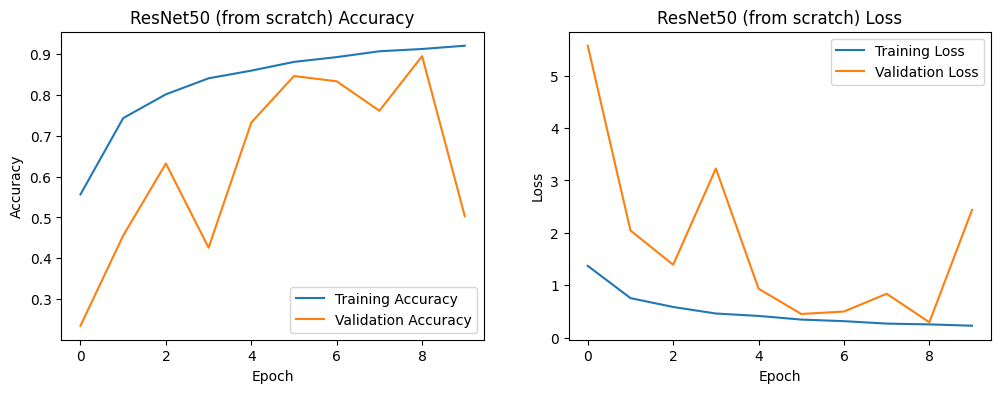


--- Training DenseNet121 from scratch ---
Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.5988 - loss: 1.2287 - val_accuracy: 0.1009 - val_loss: 6.0937
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 295s 570ms/step - accuracy: 0.8445 - loss: 0.4635 - val_accuracy: 0.7237 - val_loss: 0.9319
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 296s 572ms/step - accuracy: 0.8970 - loss: 0.3067 - val_accuracy: 0.6247 - val_loss: 1.5882
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 293s 566ms/step - accuracy: 0.9232 - loss: 0.2352 - val_accuracy: 0.5471 - val_loss: 2.0307
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 294s 568ms/step - accuracy: 0.9300 - loss: 0.2095 - val_accuracy: 0.7880 - val_loss: 0.7114
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 292s 565ms/step - accuracy: 0.9394 - loss: 0.1774 - val_accuracy: 0.7589 - val_loss: 1.0731
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 294s 569ms/step - accuracy: 0.9523 - loss: 0.1356 - val_accuracy: 0.9139 - val_loss: 0.2651
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━

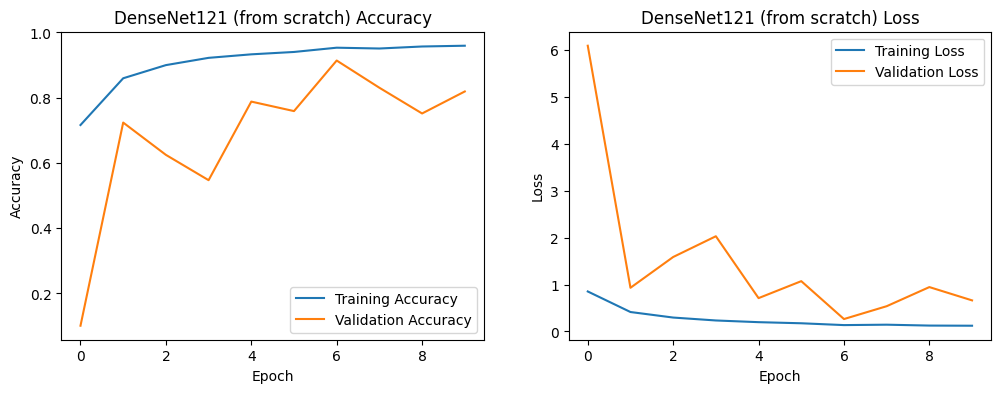

In [ ]:
# Run the training for each model
# Note: ResNet34 is not directly available in Keras, so we use ResNet50 as a close alternative for this demonstration.
hist_vgg19_scratch = build_and_train_from_scratch(VGG19, 'VGG19')
hist_resnet_scratch = build_and_train_from_scratch(ResNet50, 'ResNet50')
hist_densenet_scratch = build_and_train_from_scratch(DenseNet121, 'DenseNet121')

**Exercice 2**

In [ ]:
def build_and_train_transfer_learning(base_model_class, model_name):
    """Build and train a model using transfer learning."""
    print(f"\n--- Training {model_name} with pre-trained weights ---")

    # Load the base model with pre-trained weights
    base_model = base_model_class(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Freeze the base model layers
    base_model.trainable = False

    # Add a new classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator
    )

    plot_history(history, f'{model_name} (Transfer Learning)')
    return history


--- Training VGG19 with pre-trained weights ---
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 278s 533ms/step - accuracy: 0.2600 - loss: 2.3427 - val_accuracy: 0.5410 - val_loss: 1.7133
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 273s 528ms/step - accuracy: 0.5505 - loss: 1.6072 - val_accuracy: 0.6058 - val_loss: 1.3371
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 280s 542ms/step - accuracy: 0.6145 - loss: 1.2933 - val_accuracy: 0.6553 - val_loss: 1.1360
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 274s 530ms/step - accuracy: 0.6530 - loss: 1.1307 - val_accuracy: 0.6839 - val_loss: 1.0253
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 302s 585ms/step - accuracy: 0.6827 - loss: 1.0147 - val_accuracy: 0.6967 - val_loss: 0.9641
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 275s 532ms/step - accuracy: 0.6975 - loss: 0.9592 - val_accuracy: 0.7111 - val_loss: 0.9027
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 277s 535ms/step - accuracy: 0.7194 - loss: 0.8881 - val_accuracy: 0.

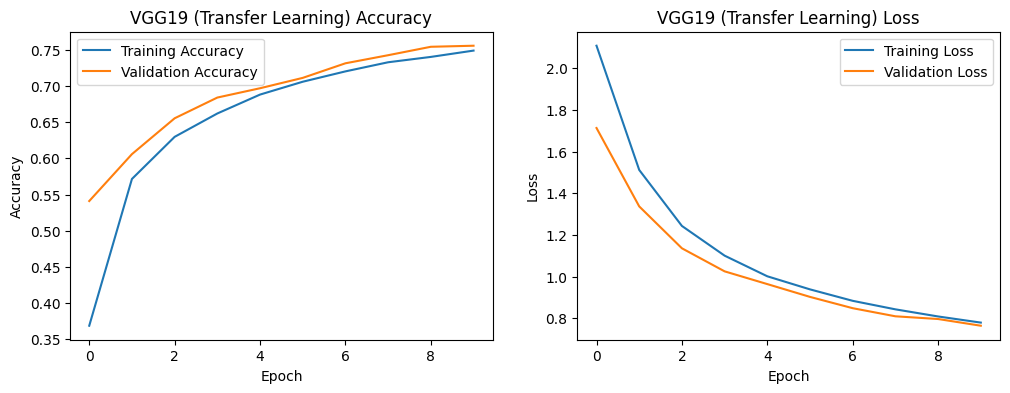


--- Training ResNet50 with pre-trained weights ---
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 297s 554ms/step - accuracy: 0.1638 - loss: 2.5542 - val_accuracy: 0.1931 - val_loss: 2.4253
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 245s 473ms/step - accuracy: 0.2125 - loss: 2.3954 - val_accuracy: 0.2555 - val_loss: 2.3310
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 244s 472ms/step - accuracy: 0.2372 - loss: 2.3328 - val_accuracy: 0.2984 - val_loss: 2.2940
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 247s 477ms/step - accuracy: 0.2599 - loss: 2.2781 - val_accuracy: 0.2606 - val_loss: 2.2352
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 246s 476ms/step - accuracy: 0.2871 - loss: 2.2204 - val_accuracy: 0.3137 - val_loss: 2.1849
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 249s 483ms/step - accuracy: 0.3004 - loss: 2.1702 - val_accuracy: 0.3100 - val_loss: 2.1462
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 246s 475ms/step - accuracy: 0.3110 - loss: 2.1354 - val_accuracy:

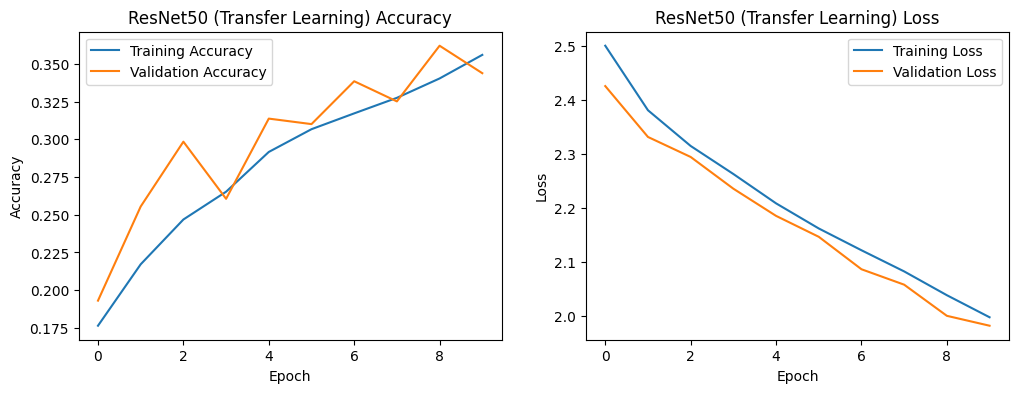


--- Training DenseNet121 with pre-trained weights ---
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 299s 533ms/step - accuracy: 0.5789 - loss: 1.4806 - val_accuracy: 0.8151 - val_loss: 0.6112
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 246s 475ms/step - accuracy: 0.8402 - loss: 0.5413 - val_accuracy: 0.8654 - val_loss: 0.4418
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 247s 478ms/step - accuracy: 0.8774 - loss: 0.4111 - val_accuracy: 0.8777 - val_loss: 0.3884
Epoch 4/10
382/517 ━━━━━━━━━━━━━━━━━━━━ 51s 378ms/step - accuracy: 0.8878 - loss: 0.3545

In [ ]:
# Run the transfer learning training for each model
hist_vgg19_tl = build_and_train_transfer_learning(VGG19, 'VGG19')
hist_resnet_tl = build_and_train_transfer_learning(ResNet50, 'ResNet50')
hist_densenet_tl = build_and_train_transfer_learning(DenseNet121, 'DenseNet121')

**Exercice 3**

In [ ]:
# Import EfficientNet and ViT (using a pre-trained ViT implementation from TensorFlow Hub or KerasCV)
from tensorflow.keras.applications import EfficientNetB0
import tensorflow_hub as hub

In [ ]:
def build_and_train_efficientnet():
    """Build and train an EfficientNet model using transfer learning."""
    print("\n--- Training EfficientNetB0 with pre-trained weights ---")

    # Load the EfficientNet model with pre-trained weights
    base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator
    )
    plot_history(history, 'EfficientNetB0 (Transfer Learning)')
    return history

In [ ]:
def build_and_train_vit():
    """Build and train a Vision Transformer (ViT) model using transfer learning."""
    print("\n--- Training ViT with pre-trained weights ---")

    # Use a pre-trained ViT model from TensorFlow Hub
    vit_model_url = "https://tfhub.dev/google/vit-base/patch16/224/1"
    hub_layer = hub.KerasLayer(vit_model_url, trainable=False)

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
        hub_layer,
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator
    )
    plot_history(history, 'Vision Transformer (Transfer Learning)')
    return history


--- Training EfficientNetB0 with pre-trained weights ---
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 302s 530ms/step - accuracy: 0.1425 - loss: 2.6031 - val_accuracy: 0.1555 - val_loss: 2.5801
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 275s 533ms/step - accuracy: 0.1480 - loss: 2.5954 - val_accuracy: 0.1555 - val_loss: 2.5979
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 285s 461ms/step - accuracy: 0.1383 - loss: 2.6033 - val_accuracy: 0.1555 - val_loss: 2.5808
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 238s 461ms/step - accuracy: 0.1485 - loss: 2.5861 - val_accuracy: 0.1031 - val_loss: 2.5840
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 239s 463ms/step - accuracy: 0.1524 - loss: 2.5888 - val_accuracy: 0.1555 - val_loss: 2.5817
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 237s 459ms/step - accuracy: 0.1463 - loss: 2.5905 - val_accuracy: 0.1555 - val_loss: 2.6030
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 238s 460ms/step - accuracy: 0.1378 - loss: 2.5934 - val_acc

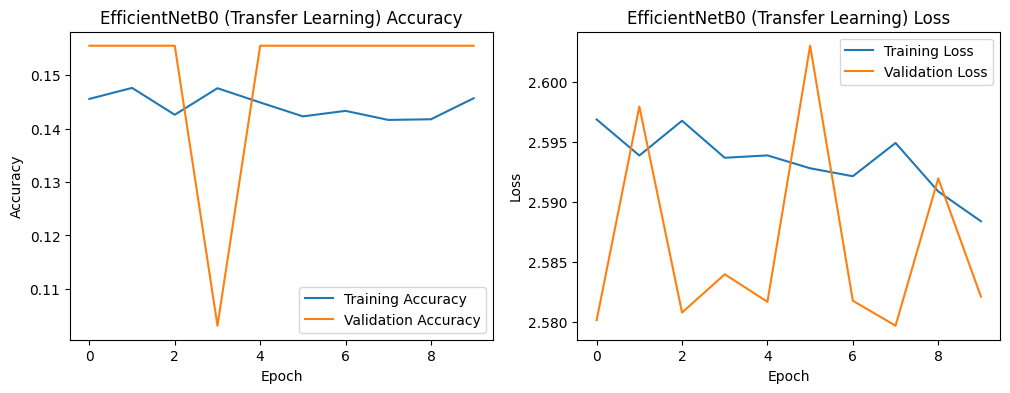


--- Training ViT with pre-trained weights ---


OSError: https://tfhub.dev/google/vit-base/patch16/224/1 does not appear to be a valid module.

In [ ]:
# Run the transfer learning for EfficientNet and ViT
hist_efficientnet = build_and_train_efficientnet()
hist_vit = build_and_train_vit()

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    """Function to plot training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

# Example usage with a 'history' object
# history_object = # The history object returned by model.fit()
# plot_history(history_object, "Model Performance")